**Copyright: © NexStream Technical Education, LLC**.  
All rights reserved 

#**Project:  Logistic Regression in Binary Classification**
#Part 1:  Introduction   
In this project, you will evaluate the features of a dataset to train logistic regression models.  
Please reference the video lecture on Logistic Regression for a description of the algorithm.
Please complete the following steps in your Colab Script.  The reference script below provides template code and hints to help with each step.  

Consider the following situations in which a machine learning algorithm might be applied:

**(A)**   Determining whether tumors are malignant or benign based on their features.  
**(B)**   Determining whether emails are legitimate or spam.  
**(C)**   Determining if online transactions are fraudulent or not.  

In all three examples, we want to know if something fits some criteria or doesn't. This is an example of *binary classification*, where the output is False/True (or 0/1). 

$y \in \{0, 1\}$

What this means is that the output of our algorithm should only take on 2 distinct values, where 1 represents the "positive class", and 0 represents "not positive" or "negative" class. For the example of a tumor classifying algorithm above, 1 might indicate that a tumor is malignant and a 0 might indicate that it is not malignant (or benign). 



---

One approach might be to use a linear regression model along with a threshold to classify whether a tumor is malignant or not. For example, a highly simplified model might use tumor size as the only feature to determine if a tumor is malignant. 

![alt text](https://docs.google.com/uc?export=download&id=1Vk_D3Wb9zHQPmkooMBMdZl78qrFzgMCp)

The dashed line in this image represents the "decision boundary", or the boundary between examples the algorithm would flag as malignant and those it would not. 

![alt text](https://docs.google.com/uc?export=download&id=1_IV9f9W1UKw_pMksdRWx5zoUYFTKFzLx)

One problem with this approach can be seen in the image above. Linear regression is highly susceptible to outliers, and so the decision boundary can be changed to an undesirable one simply by a few anomalous examples in your training data. Overall, linear regression is simply not the right tool for the job here.  Further, linear regression is typically reserved for predicting numbers, not categorical or binary classifications.

Instead, we can use the logistic function in order to model our hypothesis. The logistic function is defined as 
$$g(z) = \frac{1}{1 + e^{-z}}$$
This equation is referred to as the sigmoid function. This function has the the property that its range is strictly between 0 and 1, which is useful for us. The logistic function (or variants of it) have many other uses as well, with one example being populations of animal populations with limited resources undergoing logistic growth.  

---
**Cost function**

Recall that for linear regression, we used the mean squared error (MSE) as the cost function, where  

$$ J = \frac{1}{m}\sum (h_{\theta}(x) - y)^2$$

Also recall that for logistic regression we could not use the MSE since the distance calculation used in MSE resulted in +inf..-inf when we translated the sigmoid function in the log domain to the linear domain.  Thus the MSE doesn't work as well for logistic regression and instead we use what is called the log-likelihood.  Please see the lecture video for more introductory details on logistic regression and its cost function.

To summarize, the cost function becomes  

$$ J = \begin{cases} 
          -\log(h_{\theta}(x)) & y = 1 \\
          - \log(1 - h_{\theta}(x)) & y = 0
       \end{cases}
$$  

A plot of the functions for y=1 and y=0 should look something like this, where the blue graph is for a true value of y=1 and the red is for  a true value of y=0:
 
![alt text](https://docs.google.com/uc?export=download&id=14SavBhWaeei2dybla0GMmryen5iW2E5I)


The log function is advantageous to use because it severely penalizes the prediction if it is far off from the true value.  For example if our true case is y=1 and our predicted value is small (say 0.1) then the error (Loss) is high as shown in the blue graph.
Alternatively, if our true case is y=0 and our predicted value is high (say 0.9) then the error (Loss) is high as shown in the red graph.



The cost function can actually be simplified into a more compact (but less readable form).  Please see the lecture video for more details.
$$ cost = -y\log(h_{\theta}(x)) - (1 - y)\log(1-h_{\theta}(x))$$

Since y can only take on the values of 0 and 1, you should convince yourself that it is equivalent to the piecewise definition above. 

Over the entire set of training examples, the cost function is
$$ J = \frac{1}{m}\sum_{i=1}^{m}[-y\log(h_{\theta}(x)) - (1 - y)\log(1-h_{\theta}(x))]$$

In Part 1, you will familiarize yourself with the sigmoid and cross-entropy loss functions.  Please complete the following steps as described in the following code cell.




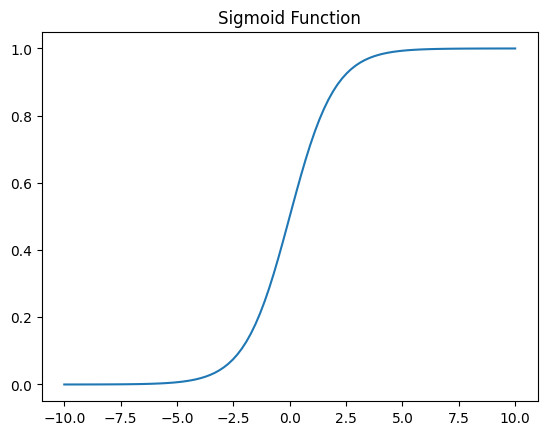

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

#Step 1:  Plot the sigmoid function
#         Hint:  see the equation in the project description notes.
#         Take a screenshot of your code and output figure, you will need to upload it.
# YOUR CODE HERE...

x = z = np.linspace(-10, 10, 100)
y = 1/(1 + np.exp(-z))
  
plt.plot(x, y)
plt.title("Sigmoid Function")
  
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

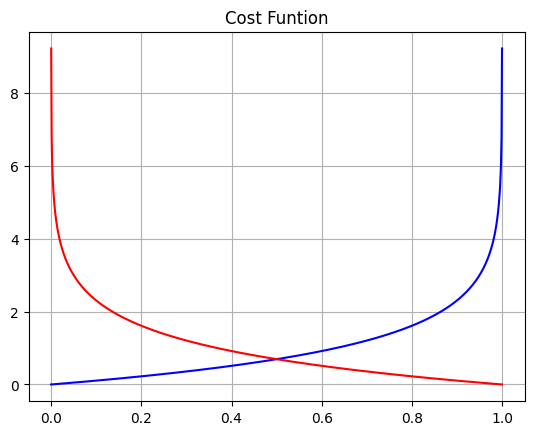

In [ ]:
#Step 2:  Plot the cost function for y=1 and y=0 on the same graph.
#         See the equation in the text cell.
#         For y = 1 --> (-log(h(x))) then create a numpy sequance from 0.0001 to 1 with 1000 points.
#         For y = 0 --> (-log(1-h(x))) then create a numpy sequance from 0 to 0.9999 with 1000 points.
#         Hint:  https://numpy.org/doc/stable/reference/generated/numpy.linspace.html 
#         Take a screenshot of your code and output figure, you will need to upload it.

# YOUR CODE HERE...
y1_data = np.linspace(0.0001, 1, 1000)
y0_data = np.linspace(0, .9999, 1000)

y1 = (-1 * np.log(y1_data))
y0 = (-1* np.log(1-y0_data))

plt.plot(y0_data, y0, c='blue')
plt.plot(y1_data, y1, c='red')
plt.grid(True)
plt.title("Cost Funtion")
plt.show

#Part 2:  Implementation of Logistic Regression

In this part you will write the functions required to implement Logistic Regression.  Implement the following steps in your colab script.  Use the function application programmer interface (API) as defined below.  See the Outline below and in the template script provided in the following code cell. Also, please reference the lecture video for more details on the algorithm.

- **Step 1:**  Upload the dataset to your Google drive and mount the drive.
- **Step 2:**  Write a function which loads a CSV file and converts the values to float.
           Input:  filename
           Output: return the dataset 
           def load_csv_file(filename):

- **Step 3:**  Write a function which normalizes the dataset.  In this step you should find the min and max of each of the independent variables (min/max of the X1 column and min/max of the X2 column), then use the equation shown in the code cell below to normalize each of the values in the column.
           Input:  dataset
           Output: return normalized dataset
           def normalize_dataset(dataset):

- **Step 4:** Write a function which implements the sigmoid function:
          Input: z
          Output:	return 1.0 / (1.0 + exp(-z))
          def sigmoid(z):


- **Step 5:** Write a function which trains the logistic regression model.  In this step you will estimate the logistic regression coefficients using stochastic gradient descent.
          Input: training dataset, learning rate, number of iterations (epochs)
          Output: Python list of coefficients
          def logRegression_train(train, lr, numIterations):

  Step 5 Hints:  
 - The following calculations are done over each sample in the training set.
 - Calc the model equation: z = b0 + b1X1 + b2X2.  
 - Apply the sigmoid function to the model equation.  
 - Calc the error.   
 - Update the coefficients: new coef = old coef + (learning rate)(error)(input).  
>_Init b0 = 0_  
>_loop over number of iterations_   
>>_loop over number of training samples_  
>>>_yhat = signmod(b0 + b1X1 + b2X2 + ... bnXn)_  
>>>_error = training result - yhat_  
>>>_b0 = b0 + (lr)(error)(1 - yhat)_  
>>>_b1 = b1 + (lr)(error)(yhat)(X1)_   
>>>_b2 = b2 + (lr)(error)(yhat)(X2)_   
>>>_bn = bn + (lr)(error)(yhat)(Xn)_   
>>>_append b0..bn to list_

    where lr = learning rate, epochs = number of iterations.  Note, for the dataset in this part, we have 2 independent variables exam score 1, exam score 2 (X1, X2) and one dependent variable, admission result (y).     


- **Step 6:** Write a function which tests the logistic regression model.
         Input: Model coeffs, test dataset, learning rate, iterations (epochs)
         Output: Python list of predictions
         def logRegression_test(coef, test, lr, numIterations):

  Step 6 Hints:  
 - The following calculations are done over each sample in the test set.
 - Calc the model equation: z = b0 + b1X1 + b2X2.  
 - Apply the sigmoid function to the model equation.  
 - Round the output of the sigmoid function to map to a binary class.
>_loop over number of test samples_   
>>_yhat = round(sigmoid(b0 + b1X1 + b2X2 + ... bnXn))_  
>>_append prediction = yhat to list_   

- **Step 7:**  Write a function which runs the logistic_regression algorithm and calculates the accuracy.
            Inputs: dataset, learning rate, number of iterations (epochs)
            Outputs: accuracy score (as %), coeffs in this ordera
            def run_logRegression(dataset, lr, numIterations):

  Main function hints:
  - In this implementation you should use the same data in the dataset for both training and testing. (you will implement a split in the next part)
  - Create 'train_set' from the input dataset feature & results columns (i.e. all columns)
  - Create 'test_set' from just the feature columns (not the results column) 
  - Generate model coefficients from function logRegression_train (train_set, learningRate, iterations)         
  - Generate prediction scores from function logRegression_test (coefs from model, test_set, learningRate, iterations)
  - Calculate the accuracy.
  Accuracy calc hints:
  - Count the number of data points where y == y_hat
  - Compute the percentage of correct/#points

- **Step 8:**  Run the doctest module to verify your outputs with the test dataset.




In [ ]:
#Step 1: Upload the dataset to your Google drive and mount the drive.
#        Hint:  Upload the dataset file file to your Google Drive.
#        Hint:  Mount your drive and change to the folder. 
#Note if get ERROR:root:Internal Python error in the inspect module error when trying to mount drive, restart runtime

# Mount drive 
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)
# cd (change directory) to the folder which contains the dataset
# YOUR CODE HERE...
%cd /content/drive/MyDrive/ML_S23-Mauro/MachineLearning/Regression/LogisticRegression

Mounted at /content/drive/
/content/drive/MyDrive/ML_S23-Mauro/MachineLearning/Regression/LogisticRegression


In [ ]:
# Step 2:   Load a CSV file and convert the values to float.
#           Input:  filename
#           Output: return the dataset
#           Hint: https://docs.python.org/3/library/functions.html#open
#           Hint: https://docs.python.org/3/library/functions.html#float
#           Hint: https://docs.python.org/3/library/stdtypes.html 
import pandas as pd

def load_csv_file(filename):
# YOUR CODE HERE...
  df = pd.read_csv(filename, names=["Exam Score 1", "Exam Score 2", "Result"]).astype(float)
  return df.values.tolist()

In [ ]:
from copy import deepcopy
# Steps 3 - 8: 
# Logistic Regression implementation
from random import randrange
from csv import reader, writer
from math import exp


#Step 3:  Normalize the dataset
#         Input:  dataset
#         Output: return normalized dataset
#         Hint:  https://docs.python.org/3/library/functions.html#min
#         Hint:  https://docs.python.org/3/library/functions.html#max 
#         Hint:  Normalize the values (x) in each column:  x_normalized = (x - column min)/(column max - column min)
#         Hint:  Normalize each column separately (find the min/max for each column, then normalize the values in that column)
def normalize_dataset(dataset):
  # normalize each column separately
  for i in range(len(dataset[0])-1):
      column = [row[i] for row in dataset]
      min_val = min(column)
      max_val = max(column)
      for j in range(len(dataset)):
          dataset[j][i] = (dataset[j][i] - min_val) / (max_val - min_val)
  return dataset
  
#         Input: z
#         Output:	return sigmoid(z)
def sigmoid(z):
# YOUR CODE HERE...
  return 1 / (1 + np.exp(-1*z))


# Step 5: Train the logistic regression model
#         Estimate the logistic regression coefficients using stochastic gradient descent
#         Input: training dataset, learning rate, number of iterations (epochs)
#         Output: Python list of coefficients
#         Hints:
#          - initialize coef list to 0 for the number of dataset training samples (= #rows in dataset)
#          - loop over numIterations (this is the number of training epochs)
#          - loop over number of training samples
#          - init z = b0, then calc the following:
#             - z = z + b1x1 + b2x2 + ... bnXn
#             - yhat = signmoid(z) 
#             - error = result (last column from the training dataset) - yhat
#          - update the coefficients:
#             - b0 = b0 + lr*error*yhat*(1-yhat)
#             - bn = bn + lr*error*yhat*(1-yhat)*xn (do this for all coeffs, b1, b2, ...)
#          - return Python list of coefficients 
def logRegression_train(train, lr, numIterations):
  coefs = [0] * (len(train[0]))
  for epoch in range(numIterations):
    for i in range(len(train)):
      X = [1] + train[i][:-1]
      Y = train[i][-1]
      z = sum([coef * x for coef, x in zip(coefs, X)])
      yHat = sigmoid(z)
      error = Y - yHat
      coefs[0] += lr * error * yHat * (1 - yHat) * X[0]
      for j in range(1, len(coefs)):
        coefs[j] += lr * error * yHat * (1 - yHat) * X[j]
  return coefs

# Step 6: Test the logistic regression model
#         Input: Trained model coefficients, test dataset, learning rate, number of iterations (epochs)
#         Output: Python list of predictions
#         Hints:
#          - loop over independent features in each row in the dataset
#             - initialize z to b0
#             - loop over all samples in the feature (all row samples in the column)
#                 - z = z + coef[i + 1] * sample[i]
#             - calculate yhat by applying sigmoid function:  yhat = sigmoid(z)  
#             - map yhat with threshold 0.5, i.e. map 0 if < 0.5, map to 1 of >=0.5 (use round)
#             - append prediction to Python list
#          - return prediction list
def logRegression_test(coef, test, lr, numIterations):
  predictions = []
  for i in range(len(test)):
    z = coef[0]
    for j in range(len(test[i])):
        z += coef[j + 1] * test[i][j]
    yHat = sigmoid(z)
    yHat = round(yHat, 0)
    predictions.append(yHat)
  return list(map(int, predictions))


# Step 7:   Run the logistic_regression algorithm and calculate the accuracy
#           Inputs: dataset, learning rate, number of iterations (epochs)
#           Outputs: accuracy score (as %), coeffs in this order
#           Main function hints:
#            - In this implementation you should use the same data in the dataset for both training and testing.
#              (you will implement a split in the next part)
#            - Create 'train_set' from the input dataset feature & results columns (i.e. all columns)
#            - Create 'test_set' from just the feature columns (not the results column) 
#            - Generate model coefficients from function logRegression_train (train_set, learningRate, iterations)         
#            - Generate prediction scores from function logRegression_test (coefs from model, test_set, learningRate, iterations)
#            - Calculate the accuracy.
#           Accuracy calc hints:
#            - Count the number of data points where y == y_hat
#            - Compute the percentage of correct/#points
def run_logRegression(dataset, lr, numIterations):
  # YOUR CODE HERE...

  #Train the model
  #Test the model (Note copy train data to test in this example (ie. we test with the training set))
  #Calculate the accuracy, return the score and coeff list
  train_set = dataset
  test_set = [[row[i] for i in range(len(row)-1)] for row in dataset]
  coefs = logRegression_train(train_set, lr, numIterations)
  predictions = logRegression_test(coefs, test_set, lr, numIterations)
  correct = sum([1 for i in range(len(train_set)) if train_set[i][-1] == predictions[i]])
  accuracy = correct / float(len(train_set)) * 100.0
  return [accuracy], coefs



#Step 8:  Run the doctest module.  DO NOT modify any code below this line!

import doctest
filename = 'TestAdmission.csv'
dataset = load_csv_file(filename)
dataset = normalize_dataset(dataset)
train_set = list(dataset)
coef = logRegression_train(train_set, 0.1, 1000)
test = list()
for row in dataset:
  row_copy = list(row[0:2])
  test.append(row_copy)
scores, coeff = run_logRegression(dataset, 0.1, 1000)

"""
#Step 2-3 test:  Load and prepare data
  >>> print(dataset[0:3])
  [[0.06542783850894099, 0.6946548757450327, 0.0], [0.0032663246723157206, 0.1947045484083302, 0.0], [0.08296784231261667, 0.6196177878273813, 0.0]]
  >>> print(sigmoid(0.934))
  0.7178860936679435
  >>> print(sigmoid(0.123))
  0.5307112905000478

#Step 4 test:  Sigmoid function
  >>> print(sigmoid(0.95))
  0.7211151780228631
  >>> print(sigmoid(0.05))
  0.5124973964842103

#Step 5 test:  Train the logistic regression model
  >>> print(logRegression_train(train_set, 0.1, 1000))
  [-8.464325024665897, 9.992512529024514, 8.978643616724892]
 
# Step 6: Test the logistic regression model
  >>> print(logRegression_test(coef, test, 0.1, 1000)[0:20])
  [0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1]

# Step 7:   Run the logistic_regression algorithm and calculate the accuracy
  >>> print('Scores:', scores, 'Coeffs:', coeff)
  Scores: [91.0] Coeffs: [-8.464325024665897, 9.992512529024514, 8.978643616724892]

"""
#Test code to set up and run your Logistic Regression implementation and output the 
#   results (scores), coefficients for the regression model (coeff), and Accuracy
filename = 'TestAdmission.csv'
dataset = load_csv_file(filename)
normalize_dataset(dataset)
learningRate = 0.1
numIterations = 1000
scores, coeff = run_logRegression(dataset, learningRate, numIterations)
print('Scores: %s' % scores)
print('Coeffs:', coeff)


doctest.testmod()

Scores: [91.0]
Coeffs: [-8.464325024665897, 9.992512529024514, 8.978643616724892]


TestResults(failed=0, attempted=8)

# Part 3 Display results and predict some results

In this part, you will visual your model results.  Follow the steps below and outlined in the following code cell.

- **Step 1:** Plot the data with the model fit equation (decision boundary).
         - Read the TestAdmission csv file.
         - Plot the data as Exam2 score (y-axis) vs. Exam1 score (x-axis) with color codes for the output.
         - Normalize the independent variable data.
         - Plot the normalized data as Exam2 score (y-axis) vs. Exam1 score (x-axis) with color codes for the output.
         - Plot the decision boundary (i.e. the regression line computed in the previous steps) on the same graph.  
           Hint:  create a numpy linspace array between 0 and 1 for the the x-axis values,  
           then for our TestAdmission dataset with 2 independent variables, calculate: 
 
 $$y = \frac{-b0 - b1x}{b2}$$


Your output should look something like this:

![alt text](https://docs.google.com/uc?export=download&id=1p7ohV76w3Ksqtel0ryfQI4yoFwLYi_xq)  

- **Step 2:** Predict the admission result for different combination of test exam scores.
         - Prompt the user for exam 1 score and exam2 score, where each score is an integer value between 0 and 100.
         - Normalize the test scores
         - Apply the prediction
         - Print the output 'Congrats you are admitted' or 'Sorry you are rejected'


Some examples of what your output should look like (see the green 'X' which were input as exam test scores 1, and 2):

![alt text](https://docs.google.com/uc?export=download&id=1eODE4iIy7eyBE7L8ZsIkxjTucHgK6I01)

 
![alt text](https://docs.google.com/uc?export=download&id=1FK-Tz1kKMkOuLPwKoIJBY3TMKhrYPGZW)


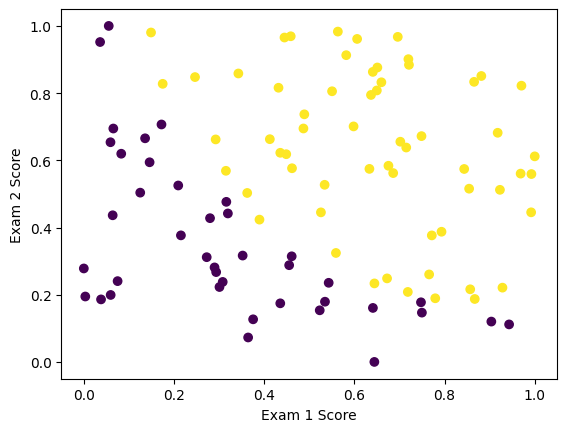

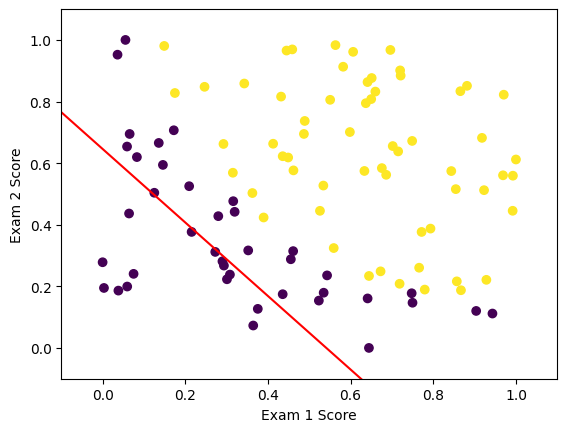

In [ ]:
# Step 1: Plot the data with the model fit equation (decision boundary).
#         Read the TestAdmission csv file.
#         Normalize the independent variable data.
#         Plot the normalized data as Exam2 score (y-axis) vs. Exam1 score (x-axis) with color codes for the output.
#         Plot the regression line computed in the previous steps on the same graph.
#         Confirm your model equation is correct.

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# YOUR CODE HERE...
dataset = load_csv_file('TestAdmission.csv')
dataset = normalize_dataset(dataset)
scores, coeff = run_logRegression(dataset, 0.01, 100)
plt.scatter([col[0] for col in dataset], [col[1] for col in dataset], c=[col[2] for col in dataset])
plt.xlabel("Exam 1 Score")
plt.ylabel("Exam 2 Score")
plt.show()


plt.scatter([col[0] for col in dataset], [col[1] for col in dataset], c=[col[2] for col in dataset])
x_values = np.linspace(-2, 2, 100)
y_values = (-1*(coeff[0] + (coeff[1] * x_values))) / coeff[2]
plt.plot(x_values, y_values, 'r')
plt.xlabel("Exam 1 Score")
plt.ylabel("Exam 2 Score")
plt.xlim([-.1, 1.1])
plt.ylim([-.1, 1.1])
plt.show()

In [28]:
# Step 2: Prompt the user for exam scores and make predictions using the model.
dataset = load_csv_file('TestAdmission.csv')
dataset = np.array(normalize_dataset(dataset))


exam1 = float(input("Enter exam score 1: "))
exam2 = float(input("Enter exam score 2: "))

exam1_norm = (exam1 - np.mean(dataset[:, 0])) / np.std(dataset[:, 0])
exam2_norm = (exam2 - np.mean(dataset[:, 1])) / np.std(dataset[:, 1])

prediction = sigmoid(coeff[0] + coeff[1] * exam1_norm + coeff[2] * exam2_norm)


if prediction > 0.5:
    print("Based on the exam scores entered, the model predicts admission.")
else:
    print("Based on the exam scores entered, the model predicts rejection.")


Enter exam score 1: 78
Enter exam score 2: 34
Based on the exam scores entered, the model predicts admission.


#Part 4: Dataset split

In the previous step, we used the training set also as the test set.  In this part, you will create a train/test split to provide a more realistic application of the trained model.  Implement a random 80% train / 20% test split in your dataset and repeat Part 2.  Hint, you can do this by calculating a test split size based on an input parameter percentage then loop through the original dataset then randomly create an index into the dataset, copy the row into the test dataset and remove the row.  The remaining rows after creating the test split will form the training set

- Rewrite the run_logRegression function and call it run_logRegression_split.  
_def run_logRegression_split(dataset, lr, numIterations, testSplitPercent):_
- Split the dataset into randomly chosen samples with 80% allocated to training and 20% allocated to test.
- Run your function several times and note the differences from run to run.  
- Are you results consistent with Part 2?  If not describe the differences you see and why that may be the case.

In [ ]:
#Part 3:  Implement a 80/20 split on your dataset.
#         Rewrite the run_logRegression function from Part 2, call it run_logRegression_split.
#         Input: dataset, learning rate, number of iteration, testSplitPercent
#         Output:  Model scores and coefficients
#         Hint:  

def run_logRegression_split(dataset, lr, numIterations, testSplitPercent):
# YOUR CODE HERE...

  #Train the model
  #Test the model 
  #Calculate the accuracy


# Setup and run the logistic regression algorithm
filename = 'TestAdmission.csv'
dataset = load_csv_file(filename)
normalize_dataset(dataset)
#print('normalized:', dataset)
learningRate = 0.1
numIterations = 1000
scores, coeff = run_logRegression_split(dataset, learningRate, numIterations, 20)
print('Scores: %s' % scores)
print('Coeffs:', coeff)
print('Mean Accuracy: %.3f%%' % (sum(scores)/float(len(scores))))
